In [30]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt 
import pickle
from dataset.mnist import load_mnist
import numpy as np
from common.layers import *
from collections import OrderedDict
%matplotlib inline


def showarray(a):
    a = np.uint8(a.reshape(28, 28) * 255)
    imshow(a)
    plt.show()

def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    y = np.dot(z2, W3) + b3

    return y

class MNIST:

    def __init__(self, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(784, 50)
        self.params['b1'] = np.zeros(50)
        self.params['W2'] = weight_init_std * np.random.randn(50, 100) 
        self.params['b2'] = np.zeros(100)
        self.params['W3'] = weight_init_std * np.random.randn(100, 10) 
        self.params['b3'] = np.zeros(10)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Sigmoid1'] = Sigmoid()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Sigmoid2'] = Sigmoid()
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db

        return grads

In [31]:

minst_net = MNIST()

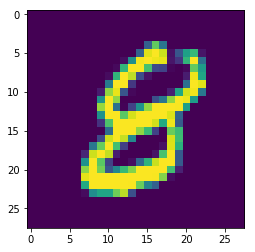

expect:  4
actual:  8 False


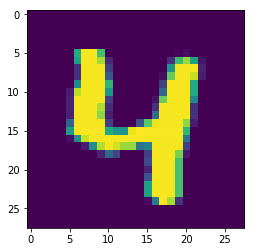

expect:  4
actual:  4 True


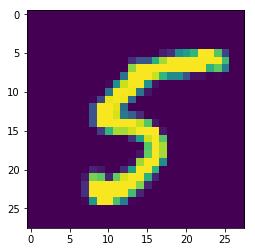

expect:  4
actual:  5 False


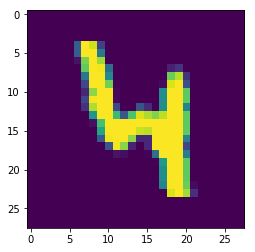

expect:  4
actual:  4 True


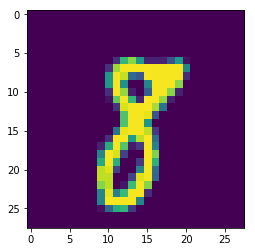

expect:  4
actual:  8 False


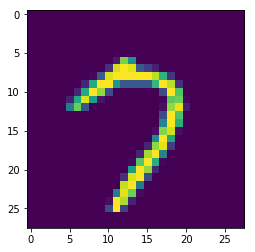

expect:  4
actual:  7 False


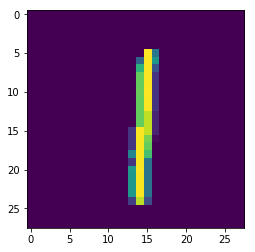

expect:  4
actual:  1 False


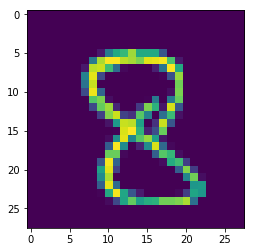

expect:  4
actual:  8 False


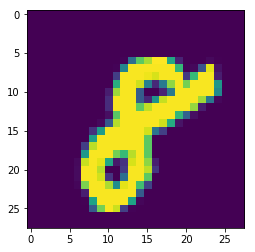

expect:  4
actual:  8 False


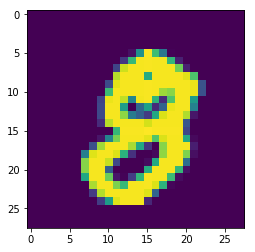

expect:  4
actual:  8 False


In [32]:


# mnist 데이터를 읽어온다.
x, t = get_data()
network = minst_net.params
accuracy_cnt = 0
sample_count = 10
for i in np.random.randint(len(x), size=(sample_count)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
    showarray(x[i])
    print("expect: ", p)
    print("actual: ", t[i], p == t[i])

In [35]:

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


iters_num = 20000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = minst_net.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        minst_net.params[key] -= learning_rate * grad[key]
    
    loss = minst_net.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = minst_net.accuracy(x_train, t_train)
        test_acc = minst_net.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Iter:" + str(i))
        print("Train: " + str(train_acc), "Test: " + str(test_acc))
        
        
        


Iter:0
Train: 0.908833333333 Test: 0.9063
Iter:600
Train: 0.914083333333 Test: 0.9137
Iter:1200
Train: 0.922033333333 Test: 0.9195
Iter:1800
Train: 0.923883333333 Test: 0.9223
Iter:2400
Train: 0.9308 Test: 0.9287
Iter:3000
Train: 0.934066666667 Test: 0.9316
Iter:3600
Train: 0.938833333333 Test: 0.9364
Iter:4200
Train: 0.941566666667 Test: 0.9396
Iter:4800
Train: 0.9432 Test: 0.9413
Iter:5400
Train: 0.947083333333 Test: 0.9452
Iter:6000
Train: 0.949216666667 Test: 0.9477
Iter:6600
Train: 0.951116666667 Test: 0.9471
Iter:7200
Train: 0.952533333333 Test: 0.9486
Iter:7800
Train: 0.953866666667 Test: 0.9504
Iter:8400
Train: 0.956033333333 Test: 0.9511
Iter:9000
Train: 0.95685 Test: 0.953
Iter:9600
Train: 0.958683333333 Test: 0.9527
Iter:10200
Train: 0.960433333333 Test: 0.9553
Iter:10800
Train: 0.961533333333 Test: 0.9568
Iter:11400
Train: 0.962666666667 Test: 0.9548
Iter:12000
Train: 0.963466666667 Test: 0.9571
Iter:12600
Train: 0.9644 Test: 0.9571


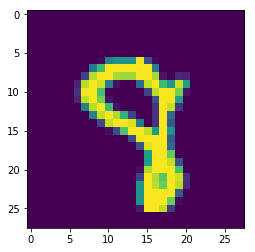

expect:  9
actual:  8 False


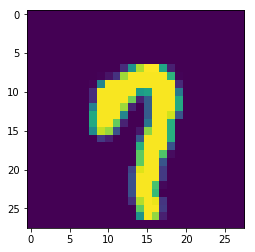

expect:  7
actual:  7 True


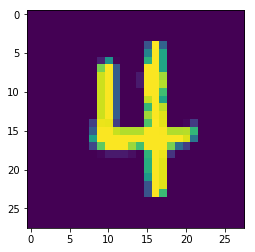

expect:  4
actual:  4 True


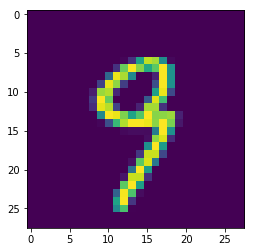

expect:  9
actual:  9 True


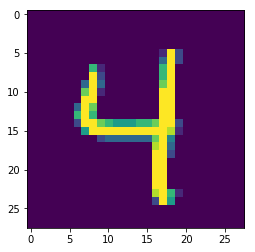

expect:  4
actual:  4 True


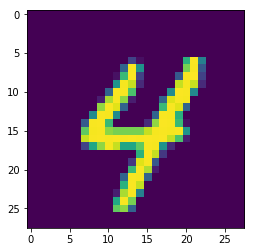

expect:  4
actual:  4 True


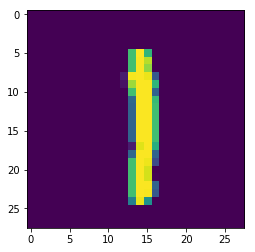

expect:  1
actual:  1 True


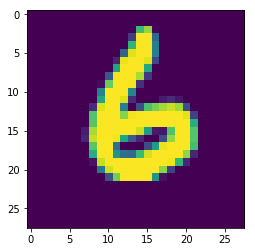

expect:  6
actual:  6 True


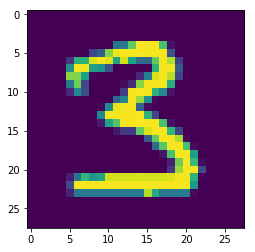

expect:  3
actual:  3 True


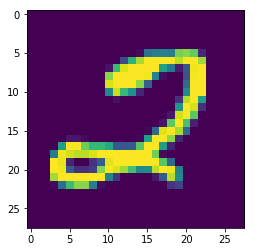

expect:  2
actual:  2 True


In [36]:


# mnist 데이터를 읽어온다.
x, t = get_data()
network = minst_net.params
accuracy_cnt = 0
sample_count = 10
for i in np.random.randint(len(x), size=(sample_count)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
    showarray(x[i])
    print("expect: ", p)
    print("actual: ", t[i], p == t[i])